In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Definindo o caminho para o arquivo CSV
file_path = 'data/human-development-index.csv'

# Carregando os dados em um DataFrame do pandas
df = pd.read_csv(file_path)

# Exibindo as primeiras linhas para verificação
df.head()

,Rank,País,IDH,IDH Ajustado à Desigualdade (IDHAD),Índice de Desenvolvimento Humano por Género,Índice de Desigualdade de Género,Índice de Pobreza Multidimensional,IDH ajustado à pressão sobre o planeta,Perda Global (%),Diferença do IDH (%)
0,1,Suíça,0.967,0.891,0.971,0.018,.,.,14.6,0.826
1,2,Noruega,0.966,0.903,0.986,0.012,.,.,16.4,0.808
2,3,Islândia,0.959,0.910,0.975,0.039,.,.,16.0,0.806
3,4,Hong Kong China (RAE),0.956,0.840,0.972,.,.,.,.,0.745
4,5,Dinamarca,0.952,0.898,0.981,0.009,.,.,11.9,0.839


In [6]:
# Definindo o caminho para o diretório de resultados
result_dir = 'result/'

# Criando o diretório se não existir
if not os.path.exists(result_dir):
    os.makedirs(result_dir)
    print(f"Diretório '{result_dir}' criado.")
else:
    print(f"Diretório '{result_dir}' já existe.")

Diretório 'result/' já existe.


In [25]:
# Substituindo "." por NaN
df.replace(".", np.nan, inplace=True)

# Verificando a existência de valores faltantes
print("\nValores faltantes por coluna antes da limpeza:")
print(df.isnull().sum())

# Listagem das colunas numéricas a serem convertidas
numeric_cols = [
    'IDH',
    'IDH Ajustado à Desigualdade (IDHAD)',
    'Índice de Desenvolvimento Humano por Género',
    'Índice de Desigualdade de Género',
    'Perda Global (%)',
    'Diferença do IDH (%)'
]

# Convertendo as colunas para tipo numérico
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Verificando novamente os valores faltantes após a conversão
print("\nValores faltantes após conversão para numérico:")
print(df.isnull().sum())

# Removendo países com dados ausentes nos indicadores essenciais
df_clean = df.dropna(subset=['IDH', 'Perda Global (%)', 'Índice de Desigualdade de Género'])

# Verificando o número de países após a limpeza
print(f"\nNúmero de países após a limpeza: {df_clean.shape[0]}")



Valores faltantes por coluna antes da limpeza:
Rank                                            0
País                                            0
IDH                                             0
IDH Ajustado à Desigualdade (IDHAD)            28
Índice de Desenvolvimento Humano por Género    10
Índice de Desigualdade de Género               19
Índice de Pobreza Multidimensional             88
IDH ajustado à pressão sobre o planeta         88
Perda Global (%)                               38
Diferença do IDH (%)                           40
dtype: int64

Valores faltantes após conversão para numérico:
Rank                                            0
País                                            0
IDH                                             0
IDH Ajustado à Desigualdade (IDHAD)            28
Índice de Desenvolvimento Humano por Género    10
Índice de Desigualdade de Género               19
Índice de Pobreza Multidimensional             88
IDH ajustado à pressão sobre o planeta  

In [26]:
# Normalização do IDH
id_min = df_clean['IDH'].min()
id_max = df_clean['IDH'].max()
df_clean.loc[:, 'IDH_normalizado'] = (df_clean['IDH'] - id_min) / (id_max - id_min)

# Normalização da Perda Global (%) - invertida
pg_min = df_clean['Perda Global (%)'].min()
pg_max = df_clean['Perda Global (%)'].max()
df_clean.loc[:, 'Perda_Global_normalizada'] = (pg_max - df_clean['Perda Global (%)']) / (pg_max - pg_min)

# Normalização do Índice de Desigualdade de Gênero (IDG) - invertida
idg_min = df_clean['Índice de Desigualdade de Género'].min()
idg_max = df_clean['Índice de Desigualdade de Género'].max()
df_clean.loc[:, 'IDG_normalizada'] = (idg_max - df_clean['Índice de Desigualdade de Género']) / (idg_max - idg_min)

# Verificação da normalização
print("\nExemplo de dados normalizados:")
display(df_clean[['País', 'IDH_normalizado', 'Perda_Global_normalizada', 'IDG_normalizada']].head())


Exemplo de dados normalizados:


C:\Users\vinic\AppData\Local\Temp\ipykernel_15108\3693113773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'IDH_normalizado'] = (df_clean['IDH'] - id_min) / (id_max - id_min)
C:\Users\vinic\AppData\Local\Temp\ipykernel_15108\3693113773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'Perda_Global_normalizada'] = (pg_max - df_clean['Perda Global (%)']) / (pg_max - pg_min)
C:\Users\vinic\AppData\Local\Temp\ipykernel_15108\3693113773.py:14: SettingWithCopyWarning: 
A v

,País,IDH_normalizado,Perda_Global_normalizada,IDG_normalizada
0,Suíça,1.000000,0.699588,0.981640
1,Noruega,0.998296,0.662551,0.988984
2,Islândia,0.986371,0.670782,0.955936
4,Dinamarca,0.974446,0.755144,0.992656
5,Suécia,0.974446,0.755144,0.975520


In [27]:
# Normalização do IDH
id_min = df_clean['IDH'].min()
id_max = df_clean['IDH'].max()
df_clean.loc[:, 'IDH_normalizado'] = (df_clean['IDH'] - id_min) / (id_max - id_min)

# Normalização da Perda Global (%) - invertida
pg_min = df_clean['Perda Global (%)'].min()
pg_max = df_clean['Perda Global (%)'].max()
df_clean.loc[:, 'Perda_Global_normalizada'] = (pg_max - df_clean['Perda Global (%)']) / (pg_max - pg_min)

# Normalização do Índice de Desigualdade de Gênero (IDG) - invertida
idg_min = df_clean['Índice de Desigualdade de Género'].min()
idg_max = df_clean['Índice de Desigualdade de Género'].max()
df_clean.loc[:, 'IDG_normalizada'] = (idg_max - df_clean['Índice de Desigualdade de Género']) / (idg_max - idg_min)

# Verificação da normalização
print("\nExemplo de dados normalizados:")
display(df_clean[['País', 'IDH_normalizado', 'Perda_Global_normalizada', 'IDG_normalizada']].head())



Exemplo de dados normalizados:


,País,IDH_normalizado,Perda_Global_normalizada,IDG_normalizada
0,Suíça,1.000000,0.699588,0.981640
1,Noruega,0.998296,0.662551,0.988984
2,Islândia,0.986371,0.670782,0.955936
4,Dinamarca,0.974446,0.755144,0.992656
5,Suécia,0.974446,0.755144,0.975520


In [28]:
# Cálculo do score composto usando .loc para evitar SettingWithCopyWarning
df_clean.loc[:, 'Score_Composto'] = (
    df_clean['IDH_normalizado'] +
    df_clean['Perda_Global_normalizada'] +
    df_clean['IDG_normalizada']
) / 3

# Verificando os scores compostos
print("\nExemplo de scores compostos:")
display(df_clean[['País', 'Score_Composto']].head())


Exemplo de scores compostos:


C:\Users\vinic\AppData\Local\Temp\ipykernel_15108\2855885026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'Score_Composto'] = (


,País,Score_Composto
0,Suíça,0.893743
1,Noruega,0.883277
2,Islândia,0.871030
4,Dinamarca,0.907415
5,Suécia,0.901704


In [29]:
# 4. Normalização dos Indicadores e Cálculo do Score Composto usando .assign()
df_clean = df_clean.assign(
    IDH_normalizado = (df_clean['IDH'] - df_clean['IDH'].min()) / (df_clean['IDH'].max() - df_clean['IDH'].min()),
    Perda_Global_normalizada = (df_clean['Perda Global (%)'].max() - df_clean['Perda Global (%)']) / (df_clean['Perda Global (%)'].max() - df_clean['Perda Global (%)'].min()),
    IDG_normalizada = (df_clean['Índice de Desigualdade de Género'].max() - df_clean['Índice de Desigualdade de Género']) / (df_clean['Índice de Desigualdade de Género'].max() - df_clean['Índice de Desigualdade de Género'].min()),
    Score_Composto = (
        (df_clean['IDH_normalizado'] +
         df_clean['Perda_Global_normalizada'] +
         df_clean['IDG_normalizada']) / 3
    )
)

# Verificação das novas colunas
print("\nExemplo de dados normalizados e Score Composto:")
display(df_clean[['País', 'IDH_normalizado', 'Perda_Global_normalizada', 'IDG_normalizada', 'Score_Composto']].head())



Exemplo de dados normalizados e Score Composto:


,País,IDH_normalizado,Perda_Global_normalizada,IDG_normalizada,Score_Composto
0,Suíça,1.000000,0.699588,0.981640,0.893743
1,Noruega,0.998296,0.662551,0.988984,0.883277
2,Islândia,0.986371,0.670782,0.955936,0.871030
4,Dinamarca,0.974446,0.755144,0.992656,0.907415
5,Suécia,0.974446,0.755144,0.975520,0.901704


In [30]:
# Ordenando os países pelo score composto em ordem decrescente
df_ranked = df_clean.sort_values(by='Score_Composto', ascending=False).reset_index(drop=True)

# Selecionando as colunas relevantes
df_ranked_final = df_ranked[['País', 'Score_Composto']].copy()

# Atribuindo a nova classificação
df_ranked_final['Nova Classificação'] = df_ranked_final.index + 1

# Reorganizando as colunas para melhor visualização
df_ranked_final = df_ranked_final[['Nova Classificação', 'País', 'Score_Composto']]

# Exibindo a classificação final
print("\nNova Classificação dos Países:")
display(df_ranked_final)


Nova Classificação dos Países:


,Nova Classificação,País,Score_Composto
0,1,Dinamarca,0.907415
1,2,Suécia,0.901704
2,3,Suíça,0.893743
3,4,Espanha,0.891168
4,5,Eslovénia,0.887991
...,...,...,...
148,149,Mali,0.434501
149,150,Níger,0.424703
150,151,Chade,0.399455
151,152,Somália,0.390322


In [31]:
# Definindo os caminhos para os arquivos de saída
csv_output_path = os.path.join(result_dir, 'top-24-paises.csv')
xlsx_output_path = os.path.join(result_dir, 'top-24-paises.xlsx')

# Salvando em formato CSV
df_ranked_final.to_csv(csv_output_path, index=False)
print(f"\nNova classificação salva em CSV: {csv_output_path}")

# Salvando em formato XLSX
df_ranked_final.to_excel(xlsx_output_path, index=False)
print(f"Nova classificação salva em XLSX: {xlsx_output_path}")



Nova classificação salva em CSV: result/top-24-paises.csv
Nova classificação salva em XLSX: result/top-24-paises.xlsx


Gráfico de barras salvo em: result/nova-classificacao-barras.png


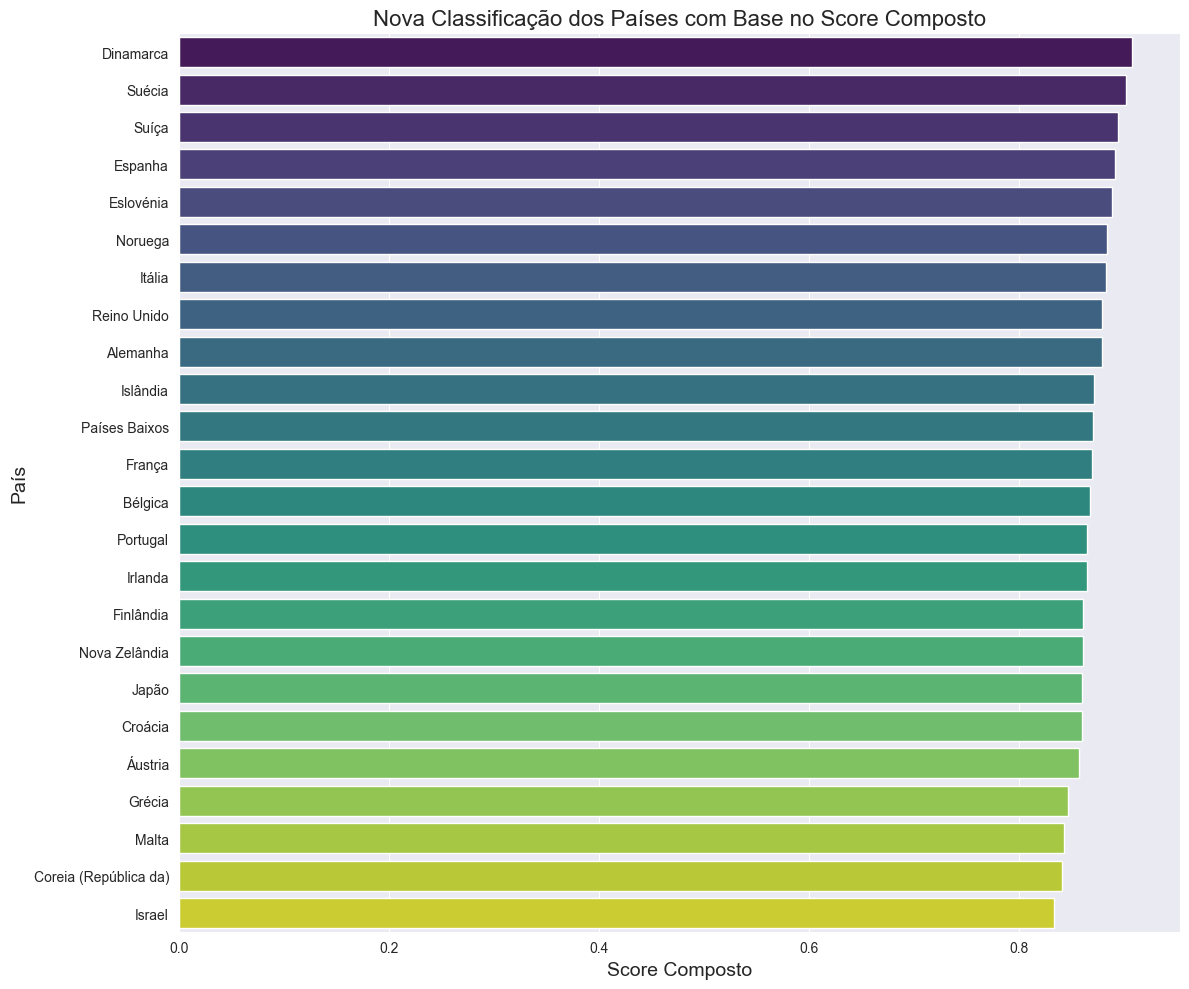

In [32]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(12, 10))

# Selecionando os 24 primeiros países
top_24 = df_ranked_final.head(24)

# Criando uma paleta com cores suficientes para os 24 países
palette = sns.color_palette("viridis", n_colors=top_24.shape[0])

# Criando o gráfico de barras com 'hue' e removendo a legenda de forma segura
ax = sns.barplot(
    x='Score_Composto',
    y='País',
    data=top_24,
    hue='País',         # Atribuindo 'País' ao parâmetro 'hue'
    palette=palette,
    dodge=False
)

# Verificando se a legenda existe antes de removê-la
if ax.legend_ is not None:
    ax.legend_.remove()

# Adicionando título e rótulos
plt.title('Nova Classificação dos Países com Base no Score Composto', fontsize=16)
plt.xlabel('Score Composto', fontsize=14)
plt.ylabel('País', fontsize=14)

# Ajustando layout para melhor visualização
plt.tight_layout()

# Salvando o gráfico
barplot_path = os.path.join(result_dir, 'nova-classificacao-barras.png')
plt.savefig(barplot_path, bbox_inches='tight')
print(f"Gráfico de barras salvo em: {barplot_path}")

# Exibindo o gráfico
plt.show()

Gráfico de barras salvo em: result/nova-classificacao-barras.png


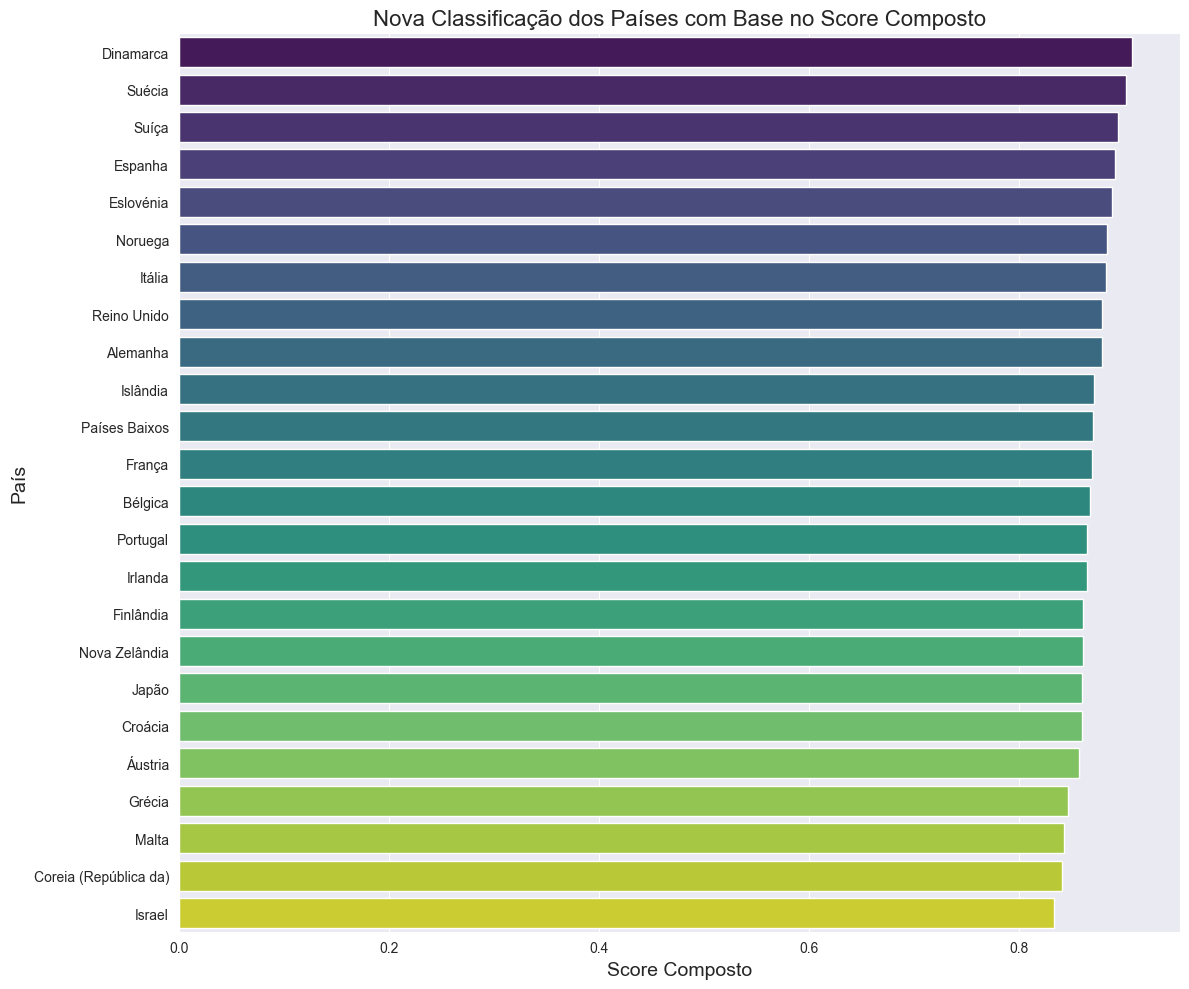

In [33]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(12, 10))

# Selecionando os 24 primeiros países
top_24 = df_ranked_final.head(24)

# Criando uma paleta com cores suficientes para os 24 países
palette = sns.color_palette("viridis", n_colors=top_24.shape[0])

# Criando o gráfico de barras com 'hue' e capturando o objeto Axes
ax = sns.barplot(
    x='Score_Composto',
    y='País',
    data=top_24,
    hue='País',         # Atribuindo 'País' ao parâmetro 'hue'
    palette=palette,
    dodge=False
)

# Verificando se a legenda existe antes de removê-la
if ax.legend_ is not None:
    ax.legend_.remove()

# Adicionando título e rótulos
plt.title('Nova Classificação dos Países com Base no Score Composto', fontsize=16)
plt.xlabel('Score Composto', fontsize=14)
plt.ylabel('País', fontsize=14)

# Ajustando layout para melhor visualização
plt.tight_layout()

# Salvando o gráfico
barplot_path = os.path.join(result_dir, 'nova-classificacao-barras.png')
plt.savefig(barplot_path, bbox_inches='tight')
print(f"Gráfico de barras salvo em: {barplot_path}")

# Exibindo o gráfico
plt.show()

Boxplot dos indicadores normalizados salvo em: result/distribuicao-indicadores-normalizados.png


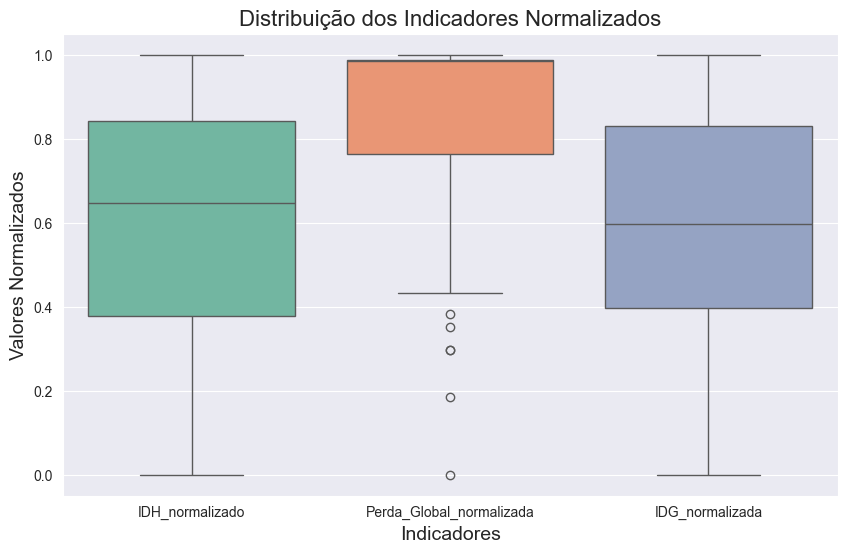

In [34]:
# Preparando os dados para o boxplot
normalized_data = df_clean[['IDH_normalizado', 'Perda_Global_normalizada', 'IDG_normalizada']]

# Definindo o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criando o boxplot
sns.boxplot(data=normalized_data, palette='Set2')

# Adicionando título e rótulos
plt.title('Distribuição dos Indicadores Normalizados', fontsize=16)
plt.ylabel('Valores Normalizados', fontsize=14)
plt.xlabel('Indicadores', fontsize=14)

# Salvando o gráfico
boxplot_path = os.path.join(result_dir, 'distribuicao-indicadores-normalizados.png')
plt.savefig(boxplot_path, bbox_inches='tight')
print(f"Boxplot dos indicadores normalizados salvo em: {boxplot_path}")

# Exibindo o gráfico
plt.show()

Mapa de calor das correlações salvo em: result/mapa-calor-correlacoes.png


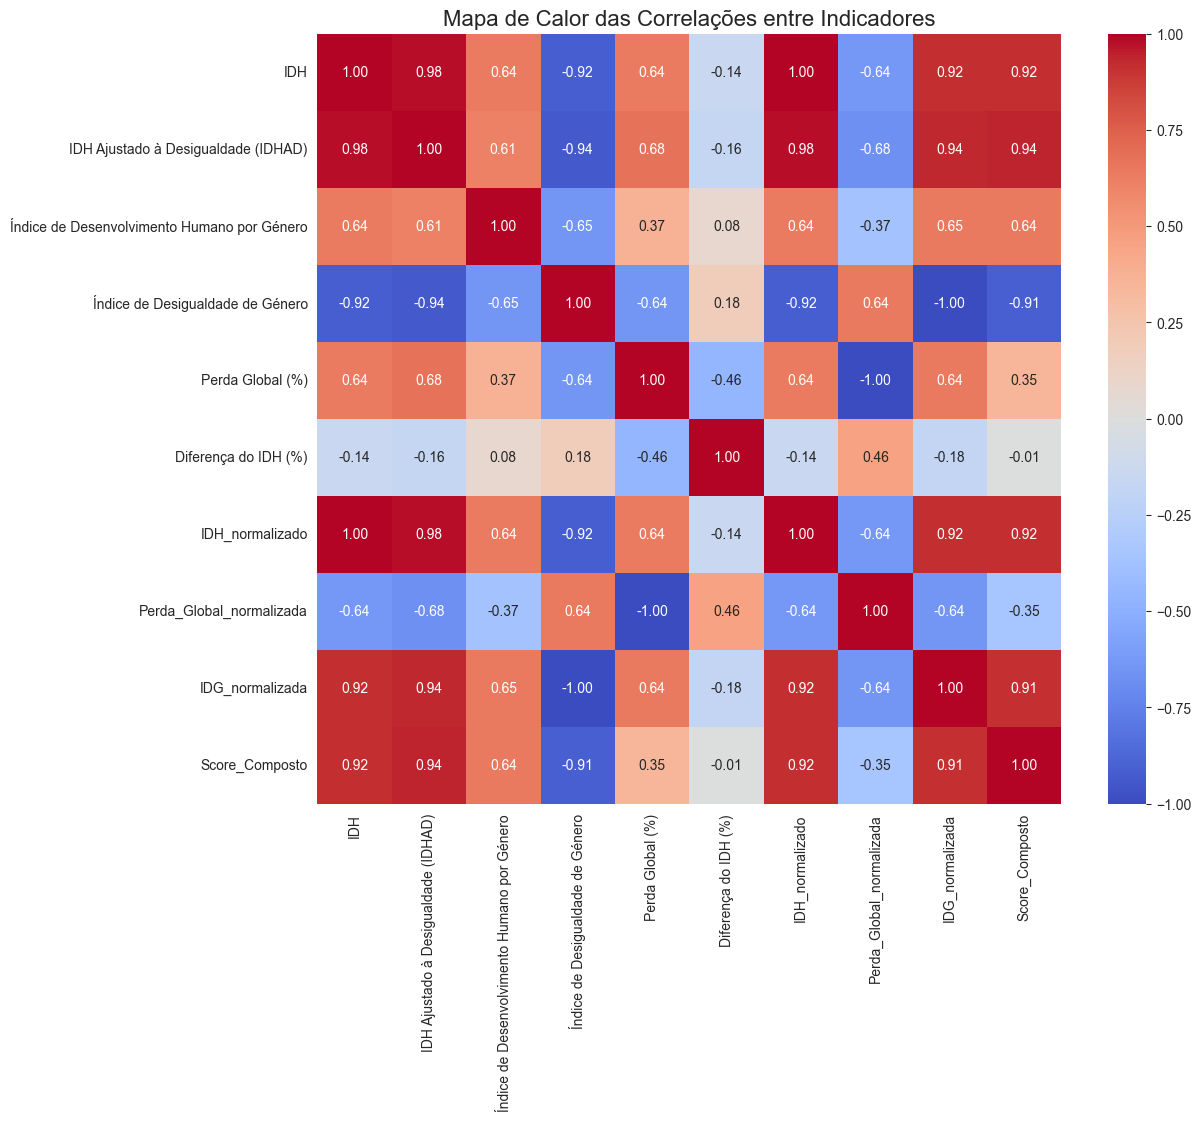

In [35]:
# Calculando a matriz de correlação
corr_matrix = df_clean[['IDH', 'IDH Ajustado à Desigualdade (IDHAD)', 'Índice de Desenvolvimento Humano por Género',
                        'Índice de Desigualdade de Género', 'Perda Global (%)', 'Diferença do IDH (%)',
                        'IDH_normalizado', 'Perda_Global_normalizada', 'IDG_normalizada', 'Score_Composto']].corr()

# Definindo o tamanho do gráfico
plt.figure(figsize=(12, 10))

# Criando o heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Adicionando título
plt.title('Mapa de Calor das Correlações entre Indicadores', fontsize=16)

# Salvando o gráfico
heatmap_path = os.path.join(result_dir, 'mapa-calor-correlacoes.png')
plt.savefig(heatmap_path, bbox_inches='tight')
print(f"Mapa de calor das correlações salvo em: {heatmap_path}")

# Exibindo o gráfico
plt.show()